In [1]:
import numpy as np
import netCDF4 as nc
import numpy.ma as MA
import pylab as plt

In [62]:
#pressure data for defining areas
press_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')
press = press_data.variables['p'][:]

alt = press_data.variables['model_level_number'][:]
zon_press = np.mean(press, axis=(0,3))[:25,:]

#field data
data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_cl.nc')
cl = data.variables['cl']
zon_cl = np.mean(cl, axis=(0,3))[:25,:]

lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]

temp_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_temp.nc')
temp = temp_data.variables['temp'][:]

kcl = 6.6e-12*np.exp(-1240/temp)
zon_kcl = np.mean(kcl, axis=(0,3))[:25,:]

Separate by pressure to get three different height sections

In [63]:
#get zones by pressure
height_1 = MA.masked_less(zon_press, 75000)
height_2 = MA.masked_outside(zon_press, 75000, 50000)
height_3 = MA.masked_outside(zon_press, 50000,25000)

Separate latitude sections

In [64]:
lat_array = np.array([lat] * 25)

sec_1 = MA.masked_greater(lat_array,-30)
sec_2 = MA.masked_outside(lat_array, -30, 0)
sec_3 = MA.masked_outside(lat_array, 0, 30)
sec_4 = MA.masked_less(lat_array, 30)

Make array of conditions defining each area

In [65]:
heights = [height_1.mask, height_2.mask, height_3.mask]
sections = [sec_1.mask, sec_2.mask, sec_3.mask, sec_4.mask]
conditions = []
for h in heights:
    for s in sections:
        conditions.append([h,s])
cond = np.asarray(conditions)
#print(cond.shape)
#print(cond[0,:,:,:])

In [70]:
#loop over conditions to get mean for each area
law_kcl = np.empty((25,73))
mean_vals = []
kcl_sec_arrays = np.empty(())
for i in range(12):
    kcl_values = MA.masked_where(np.logical_or(*cond[i,:,:,:]),zon_kcl) #extract temp values in section
    arrays = np.append(arrays, kcl_values)
    mean = np.mean(kcl_values) #get mean over this section
    mean_vals.append(mean)
    law_temps = np.where(kcl_values.mask, law_kcl, mean)

law_kcl2 = MA.masked_where(zon_press < 25000, law_kcl)
law_kcl3 = MA.masked_where(law_kcl < 0, law_kcl2)
print(mean_vals)
print(min(mean_vals))
print(max(mean_vals))
print(arrays.shape)

[6.804057156601258e-14, 9.338578574524351e-14, 9.5842889989167e-14, 6.745413783163656e-14, 4.5872602904380134e-14, 7.299252352824683e-14, 7.335906964895265e-14, 5.3225660688530246e-14, 2.900351242716422e-14, 4.6229329186516925e-14, 4.583318061353319e-14, 3.21356206425971e-14]
2.900351242716422e-14
9.5842889989167e-14
(21900,)


In [31]:
float(1.3e10)

13000000000.0

Text(0.5, 1.0, 'Mean k[Cl] by region')

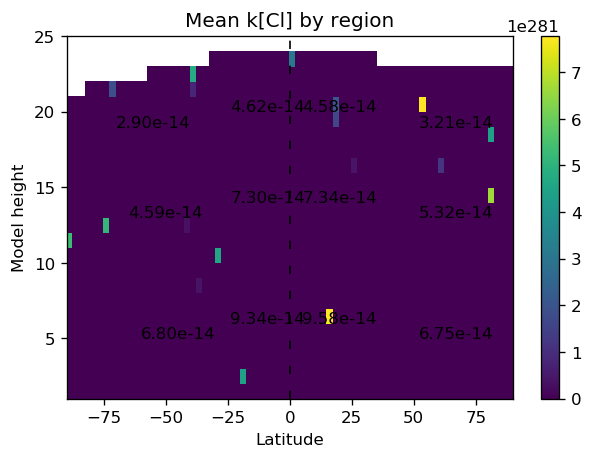

In [73]:
plt.figure(dpi=120)
plt.pcolormesh(lat,alt[:25],law_kcl2)
plt.colorbar()

plt.text(-60,5,f'{mean_vals[0]:.2e}')
plt.text(-24,6,f'{mean_vals[1]:.2e}')
plt.text(5,6,f'{mean_vals[2]:.2e}')
plt.text(52,5,f'{mean_vals[3]:.2e}')
plt.text(-65,13,f'{mean_vals[4]:.2e}')
plt.text(-24,14,f'{mean_vals[5]:.2e}')
plt.text(5,14,f'{mean_vals[6]:.2e}')
plt.text(52,13,f'{mean_vals[7]:.2e}')
plt.text(-70,19,f'{mean_vals[8]:.2e}')
plt.text(-24,20,f'{mean_vals[9]:.2e}')
plt.text(5,20,f'{mean_vals[10]:.2e}')
plt.text(52,19,f'{mean_vals[11]:.2e}')
'''
#label pressures
plt.text(70,11,'750 hPa',fontsize=8.5, weight='bold')
plt.text(70,17,'500 hPa',fontsize=8.5, weight='bold')
plt.text(70,23,'250 hPa',fontsize=8.5, weight='bold')'''

plt.axvline(x=0, linewidth=1, linestyle=(0,(5,10)), color='k')
plt.xlabel('Latitude')
plt.ylabel('Model height')
plt.title('Mean k[Cl] by region')

Text(0.5, 1.0, 'Mean temperature by region')

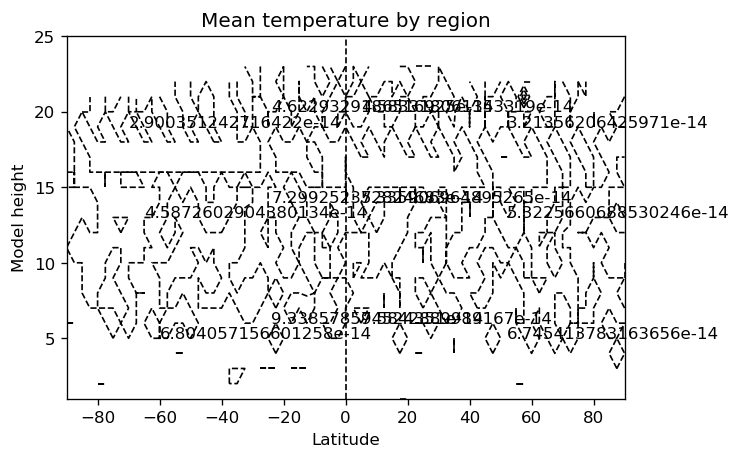

In [68]:
plt.figure(dpi=120)
plt.contour(lat,alt[:25],law_cl2,3, colors='k', linewidths=1, linestyles='dashed')

plt.text(-60,5,f'{mean_vals[0]}')
plt.text(-24,6,f'{mean_vals[1]}')
plt.text(5,6,f'{mean_vals[2]}')
plt.text(52,5,f'{mean_vals[3]}')
plt.text(-65,13,f'{mean_vals[4]}')
plt.text(-24,14,f'{mean_vals[5]}')
plt.text(5,14,f'{mean_vals[6]}')
plt.text(52,13,f'{mean_vals[7]}')
plt.text(-70,19,f'{mean_vals[8]}')
plt.text(-24,20,f'{mean_vals[9]}')
plt.text(5,20,f'{mean_vals[10]}')
plt.text(52,19,f'{mean_vals[11]}')

plt.axvline(x=0, linewidth=1, linestyle='dashed', color='k')
plt.xlabel('Latitude')
plt.ylabel('Model height')
plt.title('Mean temperature by region')

Text(0.5, 1.0, 'kcl')

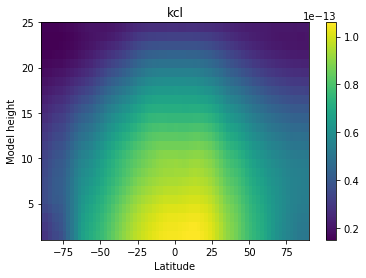

In [71]:
#for comparison
plt.pcolormesh(lat,alt[:25],zon_kcl)
plt.colorbar()

plt.xlabel('Latitude')
plt.ylabel('Model height')
plt.title('kcl')